In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams["svg.fonttype"] = "none"  # Ensures the text is not converted to paths

In [10]:
masterfile = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile/all_smOOPS_and_controls_V2.tsv', sep='\t')
masterfile = masterfile[(masterfile['smoops_naive'] == True) | (masterfile['control_common'] == True)]
masterfile["control_common"].value_counts()

control_common
True     1232
False     449
Name: count, dtype: int64

    control_common  smoops_naive
9              NaN      0.591160
16             NaN      0.204956
17             NaN      0.266026
18        0.613752           NaN
19        0.337960           NaN
        Condition  semi_naive_mean_tpm_log
0  control_common                      NaN
1  control_common                      NaN
2  control_common                      NaN
3  control_common                 0.613752
4  control_common                 0.337960
smoops_naive: 449 data points
control_common: 1232 data points
1.2416823691629661 0.21471304721581744
smoops_naive vs control_common: p-value = 0.215


/tmp/ipykernel_2488401/2112158330.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_2488401/2112158330.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_2488401/2112158330.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['control', 'naive smOOPS', 'epi smOOPS', 'diff smOOPS'])


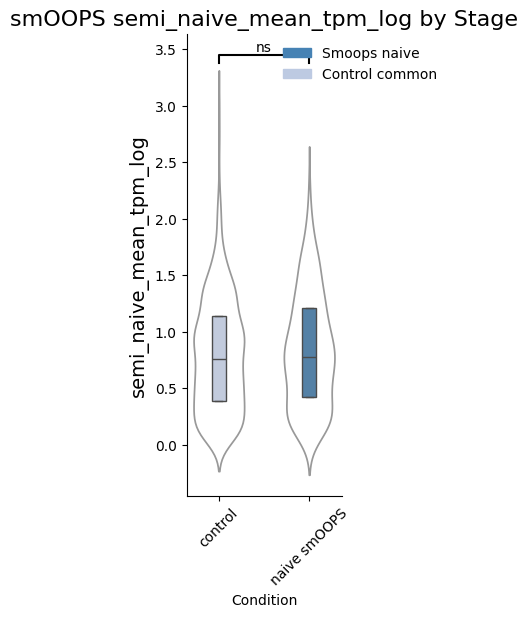

    control_common  smoops_naive
9              NaN      2.900858
16             NaN      0.603083
17             NaN      0.845126
18        3.109152           NaN
19        1.177508           NaN
        Condition  semi_naive_mean_tpm
0  control_common                  NaN
1  control_common                  NaN
2  control_common                  NaN
3  control_common             3.109152
4  control_common             1.177508
smoops_naive: 449 data points
control_common: 1232 data points
-1.1861491846593952 0.2357312509076658
smoops_naive vs control_common: p-value = 0.236


/tmp/ipykernel_2488401/2112158330.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_2488401/2112158330.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_2488401/2112158330.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['control', 'naive smOOPS', 'epi smOOPS', 'diff smOOPS'])


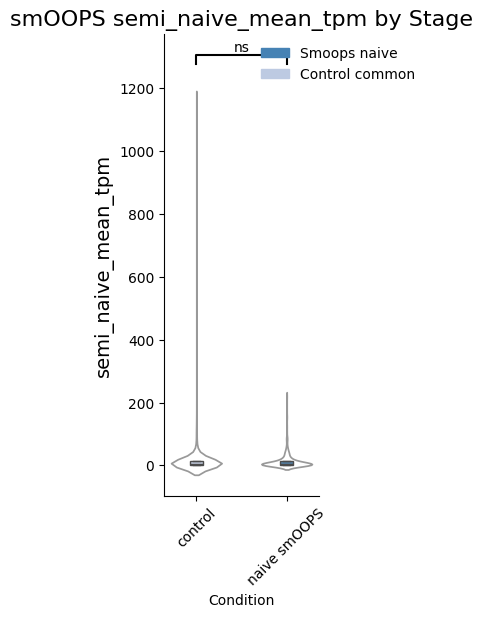

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu

def plot_boxplot(df, column=None, log=False):

    if log:
        df[f"{column}_log"] = np.log10(df[column] + 1)
        column = f"{column}_log"

    conditions = ['control_common', 'smoops_naive']
    filtered_data = pd.DataFrame({
        condition: df[df[condition] == True][column] for condition in conditions
    })
    print(filtered_data.head())

    melted_data = filtered_data.melt(var_name='Condition', value_name=column)
    
    print(melted_data.head())
    
    comparisons = [('smoops_naive', 'control_common')]
    results = []
    for test_a, test_b in comparisons:
        test_a_data = filtered_data[test_a].dropna().to_list()
        test_b_data = filtered_data[test_b].dropna().to_list()
        print(f'{test_a}: {len(test_a_data)} data points')
        print(f'{test_b}: {len(test_b_data)} data points')
        stat, p_val = ttest_ind(test_a_data, test_b_data, equal_var=False)
        #stat, p_val = mannwhitneyu(test_a_data, test_b_data, alternative='two-sided')
        print(stat, p_val)
        results.append((test_a, test_b, p_val))
        print(f'{test_a} vs {test_b}: p-value = {p_val:.3f}')
        
    hex_palette = {'smoops_naive': '#4682B4', 'control_common': '#bdcae2'}
    white_palette = {key: '#FFFFFF' for key in hex_palette.keys()}

    plt.figure(figsize=(2, 6))

    sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)

    ax = sns.boxplot(x='Condition', y=column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)    
    
    y_max = melted_data[column].max() * 1.1 
    y_step = y_max / 11 

    for idx, (test_a, test_b, p_val) in enumerate(results):
        x1, x2 = conditions.index(test_a), conditions.index(test_b)
        y, h = y_max + idx * y_step, y_step / 4
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color='black')
    
    plt.title(f'smOOPS {column} by Stage', fontsize=16)
    plt.ylabel(f'{column}', fontsize=14)
    plt.xticks(rotation=45)

    ax.set_xticklabels(['control', 'naive smOOPS', 'epi smOOPS', 'diff smOOPS'])

    legend_elements = [mpatches.Patch(color=hex_palette[name], label=name.replace('_', ' ').capitalize()) for name in hex_palette]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.7, 1), frameon=False)

    sns.despine()

    plt.show()
    
plot_boxplot(masterfile, column='semi_naive_mean_tpm', log=True)
plot_boxplot(masterfile, column='semi_naive_mean_tpm', log=False)